# Cluster analysis on Iris dataset

### Import relevant libraries

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import datasets

### Load the data

In [262]:
data = datasets.load_iris()

In [263]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [264]:
dataset = pd.DataFrame(data.data, columns = data.feature_names)

### Adding target column to the dataset

In [265]:
dataset['Species'] = data.target

In [266]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


0 denotes Iris Setosa\
1 denotes Iris Versicolor\
2 denotes Iris Virginica

### Checking for any null values

In [267]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

There are no null values.

### Visualizing correlation between the features

In [268]:
features = dataset.drop(['Species'], axis=1)

In [269]:
features.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

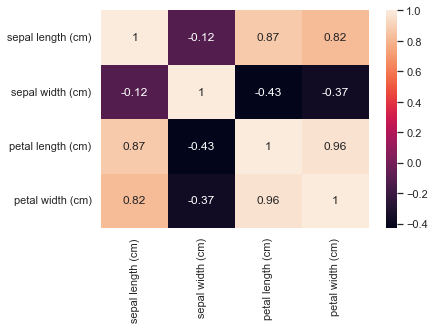

In [270]:
sns.heatmap(features.corr(), annot=True)

### Selecting the features

In [271]:
x = dataset.iloc[:, 0:4]

In [272]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Selecting the number of clusters

Even though we know there will be three clusters in this dataset, let's use the elbow method to figure out the number of clusters.

Distance between points in a cluster also known as within-cluster sum of squares (WCSS) should be minimized to reach the optimal clustering solution. In elbow method, we calculate WCSS and k(no of clusters). The value of k which gives the minimum WCSS is selected as the number of cluster.

In [273]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.46465384615384,
 39.054977867477874,
 34.29822966507177,
 30.110906071998176,
 27.86025908397476,
 26.456726388599957]

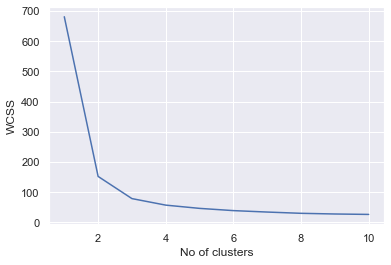

In [274]:
plt.plot(range(1,11), wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

The value of WCSS is almost consistent after the value of 3. So, 3 is the appropiate number of cluster as anticipated.

### Implementing k-means clustering

In [275]:
kmeans = KMeans(3)

In [276]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering result

In [277]:
predicted_clusters = kmeans.fit_predict(x)
predicted_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [278]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Visualizing the clusters

In [279]:
cols = dataset.columns
cols

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

We will use sepal length and sepal width as features to distinguish between different species of iris flowers.

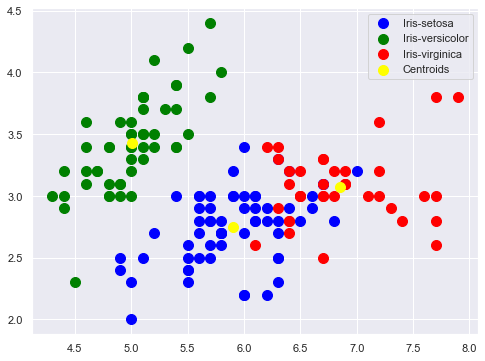

In [280]:
plt.figure(figsize=(8,6))

plt.scatter(x.loc[predicted_clusters == 0, cols[0]], x.loc[predicted_clusters == 0, cols[1]], 
            s=100, c='blue', label='Iris-setosa')
plt.scatter(x.loc[predicted_clusters == 1, cols[0]], x.loc[predicted_clusters == 1, cols[1]], 
            s=100, c='green', label='Iris-versicolor')
plt.scatter(x.loc[predicted_clusters == 2, cols[0]], x.loc[predicted_clusters == 2, cols[1]], 
            s=100, c='red', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='yellow',
            label='Centroids')

plt.legend()
plt.show()

### Evaluating model's performance

In [281]:
pd.crosstab(data.target, predicted_clusters)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36


-  Iris-setosa is perfectly clustered by the model.
-  2 observations from Iris-versicolor has been misclassified.
-  14 observations from Iris-verginica has been misclassified.